# Student Grades and Alcohol Consumption

In this dataset there are the informations of students Portuguese courses.
What we are going to do is to arrange these data, make a social analysis and then a prediction to know the final grade.

In [1]:
#import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read datasets
student=pd.read_table("student-por.csv", sep=',')

student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Before proceeding with an analysis it is useful to know what the columns and its values refer to.

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - 1 hour)
14. studytime - weekly study time (numeric: 1 - 10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

In [2]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [3]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


What we can initially see is that:
- there are no NaN values
- all the features are on different scales
- many of these are categorical
- the average of all students is constant throughout the period and is around 11
- Moms and dads have an education between the 5th and 9th grade
- The average that a student devotes to study is approximately 2 hours
- Students are in excellent health and do not have excessive alcohol consumption throughout the week (according to a subjective opinion)
- G1 and G2 is very similar to G3

Now seeing the correlation between the values.

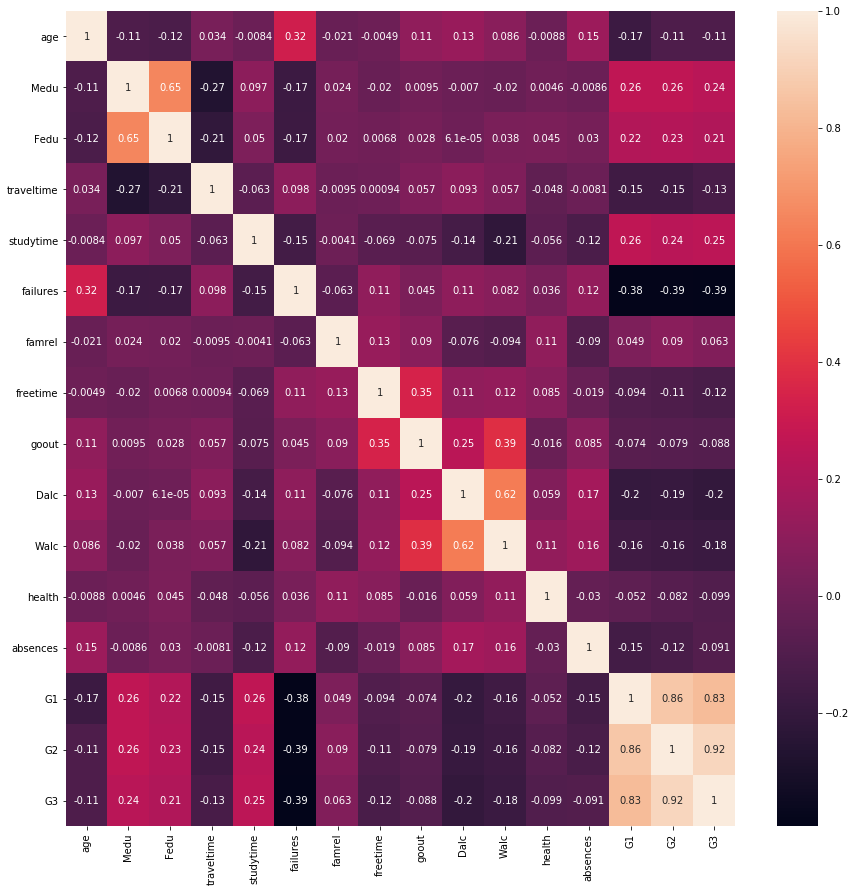

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(student.corr(), annot=True)

This graph gives us a general picture of how everything affects grades.

Before going for a more in-depth analysis, however, we note other things:
- G1, G2, G3 are closely related each other. Which mean: If the average of the marks of G1 and G2 does not vary, these two features would be enough to predict G3. I could think to delete G1 and G2 as they are closely correlated with G3
- Failures are also closely related to grades. It is obvious that with good grades the chances of failure decrease
- Study time and weekend alcohol consumption also influence each other. A student who tends to drink (so go out more times) a lot reduces the hours of study and viceversa

Text(0.5, 1.0, 'Age of students by sex')

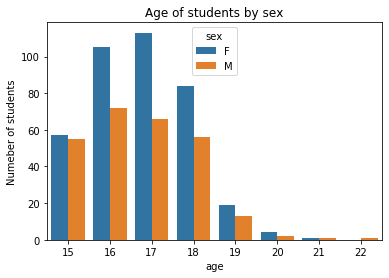

In [5]:
sns.countplot('age', data=student, hue='sex')
plt.ylabel('Numeber of students')
plt.title('Age of students by sex')

For my analysis, since the grades are closely related to each other, I will only consider G3.

Text(0.5, 1.0, 'Better sex on G3')

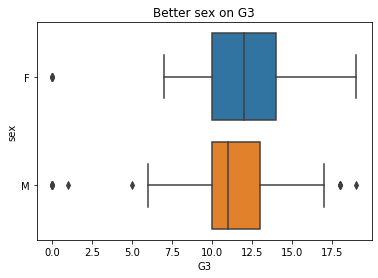

In [8]:
sns.boxplot('G3', 'sex', data=student)
plt.title ('Better sex on G3')

The boys have a lower average than girls. Now we will see if feature 'age' is relevant on G3.

Text(0.5, 1.0, 'G3 Avarage based on age ')

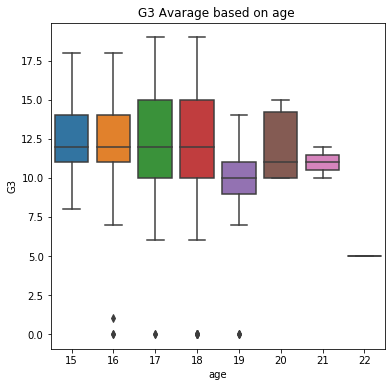

In [9]:
plt.figure(figsize=(6,6))
sns.boxplot(x="age",y="G3",data=student)
plt.title('G3 Avarage based on age ')

The average of the final grade, even if not by much, decreases with increasing age. This can be due to many factors that make students more mature and more free to do things.

Let's do a check.

First we check the number of students who have failed and for how many times.

Text(0.5, 1.0, 'failures per age')

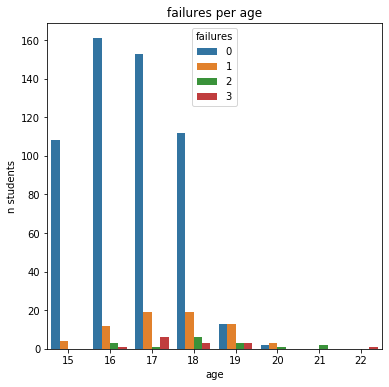

In [11]:
plt.figure(figsize=(6,6))
sns.countplot('age', data=student, hue='failures')
plt.ylabel('n students')
plt.title('failures per age')

As we can see there are many students who fail and repeat the year. Students thus tend to finish school later and also lose concentration in their studies, so that they also have a lower average.

Text(0.5, 1.0, 'Alcohol consumption based on age')

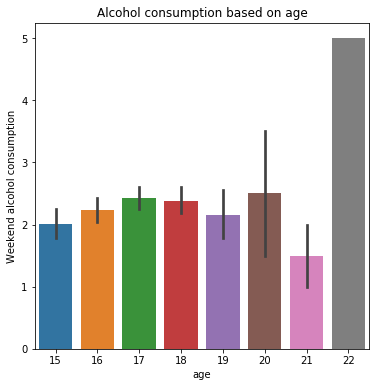

In [7]:
plt.figure(figsize=(6,6))
sns.barplot(x="age",y="Walc",data=student)
plt.ylabel('Weekend alcohol consumption')
plt.title('Alcohol consumption based on age')

Average students alcohol consumption does not appear to be high, except for older students.

With these other 2 graphs we will see if with increasing age the outputs also increase.

Text(0.5, 1, 'Go out based on age')

<Figure size 432x432 with 0 Axes>

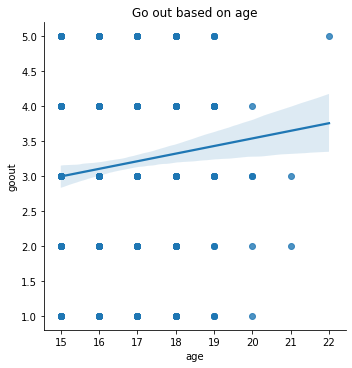

In [8]:
plt.figure(figsize=(6,6))
sns.lmplot(x="age",y="goout",data=student)

plt.title('Go out based on age')

Text(0.5, 1.0, 'Go out based on age')

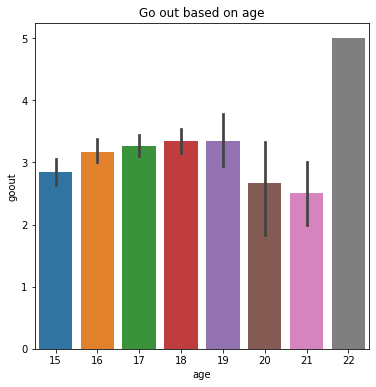

In [9]:
plt.figure(figsize=(6,6))

sns.barplot(x="age",y="goout",data=student)
plt.title('Go out based on age')

Here is how we can see there is a slightly negative influence. Students between the ages of 16 and 19 are the ones most affected by outings. In fact, as you can see from the previous graph, there are more failures included in that age group.

Now let's see if the weekly study hours affect the final grade.

Text(0.5, 1.0, 'Influence of weekly study hours')

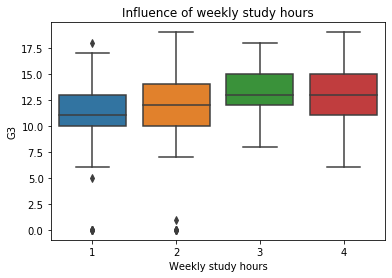

In [15]:
sns.boxplot('studytime', 'G3', data=student)
plt.xlabel("Weekly study hours")
plt.title('Influence of weekly study hours')

The hours of study per week influence the average grade of students. The greater the dedication, the greater the final grade.

But how is the average affected if we also consider extracurricular activities and a romantic relationship?

Text(0.5, 1.0, 'Influence of extracurricular activities and \nromantic relationship on final grades.')

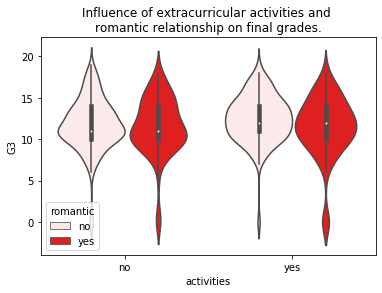

In [16]:
sns.violinplot('activities', 'G3', data=student, hue='romantic', color='r')
plt.title('Influence of extracurricular activities and \nromantic relationship on final grades.')

Most students have an average of around 11, but also we can see that some students have slightly higher grades. The extra-curricular activities and romantic relationship does not affect G3.

Text(0.5, 1.0, 'Final grades based on family')

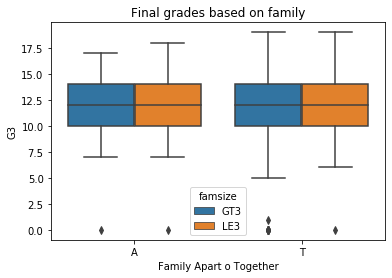

In [10]:
sns.boxplot('Pstatus', 'G3', data=student, hue='famsize')
plt.xlabel('Family Apart o Together')
plt.title('Final grades based on family')

Family status don't influence school performance.

Text(0.5, 0, 'Alcohol consumption')

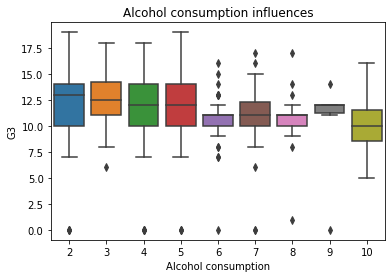

In [11]:
student['walcool']= student['Dalc']+ student['Walc'] #create and sum (provvisory) alchol daily and weekend consuption
sns.boxplot('walcool', 'G3', data=student)
plt.title('Alcohol consumption influences')
plt.xlabel('Alcohol consumption')

In [12]:
student= student.drop('walcool', axis=1) #deleting provvisory column

The alcohol consumption is not strictly related to the grades of the students, at least not as excessively as you might think. A student who drinks more tends to have a not so high G3.

Text(0.5, 1.0, 'G3 based on nursery')

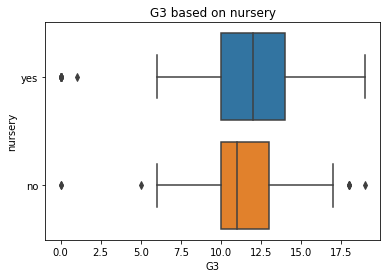

In [13]:
sns.boxplot('G3', 'nursery', data=student)
plt.title('G3 based on nursery')

This last graph compares G3 with nursery and non-nursery students. There is not a big difference between the two, except in the median of the grades. In nursery schools it is higher.

### Cleaning data

For our best prediction we have to clean the data, so transform the features.

In [14]:
#transform binary value in 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

student.nursery = le.fit_transform(student['nursery'])
student.internet = le.fit_transform(student['internet'])
student.schoolsup = le.fit_transform(student['schoolsup'])
student.activities = le.fit_transform(student['activities'])
student.paid = le.fit_transform(student['paid'])
student.higher = le.fit_transform(student['higher'])
student.school=le.fit_transform(student['school'])
student.address=le.fit_transform(student['address'])
student.sex=le.fit_transform(student['sex'])
student.Pstatus=le.fit_transform(student['Pstatus'])
student.famsize=le.fit_transform(student['famsize'])
student.famsup=le.fit_transform(student['famsup'])
student.activities=le.fit_transform(student['activities'])
student.romantic=le.fit_transform(student['romantic'])


#now for other data not boolean we can do an one-hot encoding
student = pd.get_dummies(student, columns = ['Mjob', 'Fjob', 'reason', 'guardian'])
student

student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


### Grades prediction

What we are going to do is calculate the final grade of a student thanks to our machine learning models, evaluating which is the best.

In [15]:
#import models and metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.metrics import r2_score, mean_absolute_error

In [29]:
#separating data
X = student.drop (['school','failures', 'absences', 'G1', 'G2', 'G3'], axis=1)
y = student.G3

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
skf = StratifiedKFold(n_splits=10, random_state=90, shuffle=True) #cross validation with 10 split

To calculate the final grade I want to evaluate these three model of ML. I'm starting to use models that don't need to be scale like DecisionTree and RandomForestRegressor after that I'm going to take in consideration SVR.

To make more realistic my analysis I deleted G1 and G2 because is too close to G3 and school, failures and abseces because I want to predict G3 based on social status. So my prediction will based on other features.

#### DecisionTree

In [31]:
#defining parameters for decision tree regressor
params= { 'max_features':[0.5], #[0.1,0.2,0.3,0.4,0.5],
    'min_samples_split':[0.1], #5,6,7,8, 0.1,0.2
    'min_samples_leaf':[0.1], #2,3,4,5,6,7,8,0.1,0.2,0.3
        }

reg_tree = DecisionTreeRegressor()
gs = GridSearchCV(estimator=reg_tree, param_grid=params, cv=5, n_jobs=-1) #validate model with his parameters
gs.fit(X_train, y_train) #fitting training set

reg_tree = gs.best_estimator_
print(reg_tree) #printing best estimator values

pred_tree = reg_tree.predict (X_test)

#printing scores
dt_score = r2_score(y_test, pred_tree)
dt_mae = mean_absolute_error(y_test, pred_tree)
print('MAE: %.2f' %dt_mae)
print('Score: %.2f' %dt_score)

importances = reg_tree.feature_importances_
indices= np.argsort(importances)[::-1]
# summarize feature importance
for i,v in enumerate(importances):
    print("%d. Feature %s(%.3f)" % (i + 1, X.columns.values[indices[i]], importances[indices[i]]))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.1, min_samples_split=0.1,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
MAE: 2.19
Score: 0.04
1. Feature address(0.312)
2. Feature Medu(0.243)
3. Feature reason_reputation(0.184)
4. Feature studytime(0.147)
5. Feature age(0.114)
6. Feature famsup(0.000)
7. Feature romantic(0.000)
8. Feature internet(0.000)
9. Feature higher(0.000)
10. Feature nursery(0.000)
11. Feature activities(0.000)
12. Feature paid(0.000)
13. Feature guardian_other(0.000)
14. Feature schoolsup(0.000)
15. Feature freetime(0.000)
16. Feature traveltime(0.000)
17. Feature Fedu(0.000)
18. Feature Pstatus(0.000)
19. Feature famsize(0.000)
20. Feature famrel(0.000)
21. Feature goout(0.000)
22. 

#### RandomForest Regressor

In [25]:
params = {'n_estimators':[1000],
        'min_samples_leaf': [4], #2,3,4,5,6,7
        'min_samples_split': [4], #2,3,4,5,6
          'max_features': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

             }


reg_forest = RandomForestRegressor()
gs = GridSearchCV(reg_forest,params, cv=5, n_jobs=-1) #validation for Random Forest
gs.fit (X_train, y_train)
reg_forest=gs.best_estimator_
print(reg_forest)

pred_forest = reg_forest.predict (X_test)
rf_score = r2_score(y_test, pred_forest) 
rf_mae = mean_absolute_error(y_test, pred_forest)
print('MAE: %.2f' %rf_mae)
print('Score: %.2f' %rf_score)

#features importance
importances = reg_forest.feature_importances_
indices= np.argsort(importances)[::-1]
# summarize feature importance
for i,v in enumerate(importances):
    print("%d. Feature %s(%.3f)" % (i + 1, X.columns.values[indices[i]], importances[indices[i]]))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
MAE: 1.89
Score: 0.28
1. Feature higher(0.110)
2. Feature age(0.075)
3. Feature Medu(0.061)
4. Feature health(0.053)
5. Feature studytime(0.052)
6. Feature address(0.050)
7. Feature famrel(0.050)
8. Feature Fedu(0.049)
9. Feature Walc(0.047)
10. Feature freetime(0.046)
11. Feature goout(0.042)
12. Feature Dalc(0.037)
13. Feature internet(0.027)
14. Feature traveltime(0.025)
15. Feature reason_course(0.020)
16. Feature reason_reputation(0.019)
17. Feature schoolsup(0.017)
18. Feature famsup(0.017)
19.

#### Scaling 

In [20]:
#scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #fitting and transform training data
X_test = scaler.transform(X_test) #transform test data

Now I scaled data because I want to try with SVR

#### SVR

In [21]:
params= {
    'kernel':['rbf'], #linear
    'C':[0.9], #[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'epsilon':[1.2], #[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,1.1,1.2,1.3,1.4],
    'gamma':[0.01], #[0.1,0.2,0.3,0.4,0.5]
        }

reg_svr = SVR()
gs = GridSearchCV(reg_svr,params, cv=5, n_jobs=-1) #validation for Random Forest
gs.fit (X_train, y_train)
reg_svr=gs.best_estimator_
print(reg_svr)

pred_svr = reg_svr.predict (X_test)
svr_score = r2_score(y_test, pred_svr)
svr_mae = mean_absolute_error(y_test, pred_svr)
print('MAE: %.2f' %svr_mae)
print('Score: %.2f' %svr_score)


#importeance only for linear kernel
#importance = reg_svr.coef_
#indices= np.argsort(importance)[::-1]
# summarize feature importance
#for i,v in enumerate(importance):
#    print("%d. Feature %s(%.2f)" % (i+1, X.columns.values[indices[i]], importance[indices[i]]))

SVR(C=0.9, cache_size=200, coef0=0.0, degree=3, epsilon=1.2, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MAE: 1.85
Score: 0.28


##### Best scroring

In [32]:
from tabulate import tabulate
data=[[svr_score, svr_mae],
      [rf_score, rf_mae],
      [dt_score, dt_mae ]]
index = ['SVR','Random Forest Regressor', 'Decision Tree Regressor']
tab = pd.DataFrame(data, index=index, columns=['R2 score', 'MAE']).sort_values('R2 score',ascending = False).round(2)

   

print(tabulate(tab, headers= ['Model', 'R2 score', 'MAE'],tablefmt='fancy_grid'))


╒═════════════════════════╤════════════╤═══════╕
│ Model                   │   R2 score │   MAE │
╞═════════════════════════╪════════════╪═══════╡
│ SVR                     │       0.28 │  1.85 │
├─────────────────────────┼────────────┼───────┤
│ Random Forest Regressor │       0.28 │  1.89 │
├─────────────────────────┼────────────┼───────┤
│ Decision Tree Regressor │       0.04 │  2.19 │
╘═════════════════════════╧════════════╧═══════╛


#### Important features

In our model the most important and influence feature is higher and age.